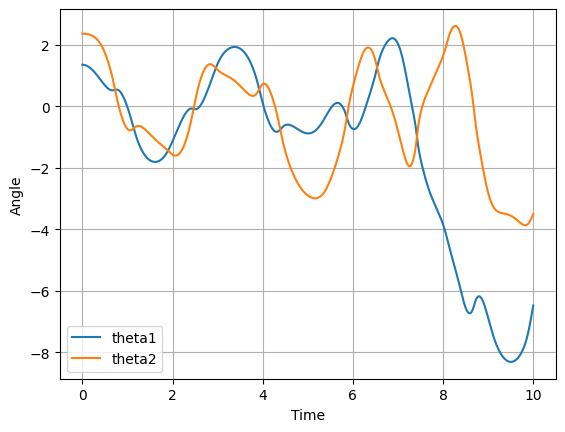

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Physical constants
g = 9.8
m1 = 1.0
m2 = 1.0
l1 = 1.0
l2 = 1.0

# The system of equations describing the double pendulum
def equations(y0, t):
    theta1, z1, theta2, z2 = y0
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)
    theta1_dot = z1
    z1_dot = (m2*g*np.sin(theta2) - m2*s*(l1*z1**2*c + l2*z2**2) - (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)
    theta2_dot = z2
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)
    return theta1_dot, z1_dot, theta2_dot, z2_dot

# initial conditions: angles are in radians and angular velocities are in rad/s
y0 = [3*np.pi/7, 0, 3*np.pi/4, 0]

# time array for the solution
t = np.linspace(0, 10, 1000)

# solve the ODE using scipy.integrate.
y = odeint(equations, y0, t)

# Visualization
fig, ax = plt.subplots()
ax.plot(t, y[:, 0], label='theta1')
ax.plot(t, y[:, 2], label='theta2')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.grid()
plt.show()


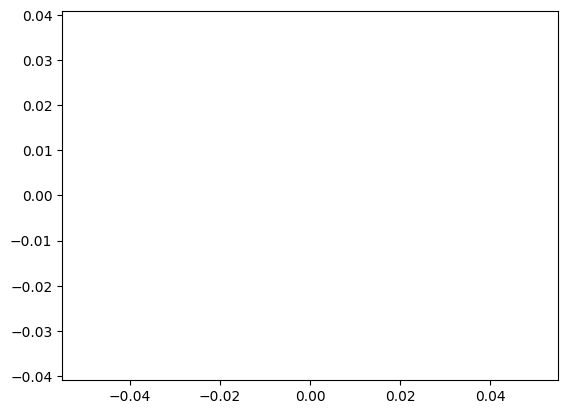

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Physical constants
g = 9.8
m1 = 1.0
m2 = 1.0
l1 = 1.0
l2 = 1.0

# The system of equations describing the double pendulum
def equations(y0, t):
    theta1, z1, theta2, z2 = y0
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)
    theta1_dot = z1
    z1_dot = (m2*g*np.sin(theta2) - m2*s*(l1*z1**2*c + l2*z2**2) - (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)
    theta2_dot = z2
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)
    return theta1_dot, z1_dot, theta2_dot, z2_dot

# initial conditions: angles are in radians and angular velocities are in rad/s
y0 = [3*np.pi/7, 0, 3*np.pi/4, 0]

# time array for the solution
t = np.linspace(0, 10, 250)

# solve the ODE using scipy.integrate.
y = odeint(equations, y0, t)

# Transform to Cartesian coordinates
x1 = l1 * np.sin(y[:, 0])
y1 = -l1 * np.cos(y[:, 0])
x2 = x1 + l2 * np.sin(y[:, 2])
y2 = y1 - l2 * np.cos(y[:, 2])

fig, ax = plt.subplots()

ax = plt.gca()
ax.set_aspect('equal', adjustable='datalim')

line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=True)

plt.show()